In [1]:
import pandas as pd
import numpy as np

# Load the Dataset
df = pd.read_csv('Global_Superstore.csv')

# Inspect the Dataset
print("Dataset Info:")
print(df.info())  # Check for data types and missing values
print("\nFirst 5 Rows:")
print(df.head())  # Preview the first few rows of the dataset


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    5

In [24]:
def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean the dataset by handling missing values and removing duplicates.
    
    Args:
        df (pd.DataFrame): Input DataFrame containing sales and profit data.
        
    Returns:
        pd.DataFrame: Cleaned DataFrame with handled missing values and no duplicates.
    """
    # Display initial missing values statistics
    print("\nMissing Values Before Handling:")
    print(df.isnull().sum())
    
    # Handle missing values
    numerical_columns = ['Sales', 'Profit']
    categorical_columns = ['Region']
    
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].median())
    
    for col in categorical_columns:
        df[col] = df[col].fillna('Unknown')
    
    # Display final missing values statistics
    print("\nMissing Values After Handling:")
    print(df.isnull().sum())
    
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    return df

# Apply cleaning
df = clean_dataset(df)
df.describe()


Missing Values Before Handling:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       29821
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
YearMonth             0
dtype: int64

Missing Values After Handling:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       29821
Market                0
Region    

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,37703.000000,37703,7882.000000,37703.000000,37703.000000,37703.000000,37703.000000,37703.000000
mean,25923.516776,2013-05-13 11:03:11.252685568,55900.464730,88.494541,3.095297,0.128470,10.755792,9.595393
min,1.000000,2011-01-01 00:00:00,1040.000000,0.444000,1.000000,0.000000,-40.020000,0.002000
25%,12623.000000,2012-06-20 00:00:00,23618.000000,22.620000,2.000000,0.000000,0.771600,1.880000
50%,26403.000000,2013-07-12 00:00:00,60440.000000,51.312000,3.000000,0.000000,7.200000,4.720000
75%,39004.500000,2014-05-23 00:00:00,90008.000000,114.390000,4.000000,0.200000,20.158400,11.305000
max,51290.000000,2014-12-31 00:00:00,99301.000000,581.250000,14.000000,0.800000,66.660000,246.050000
std,14998.024398,NaN,32078.368814,100.037706,2.021151,0.201124,19.514843,14.107422


In [5]:
# Detect and Handle Outliers using IQR Method for 'Sales' and 'Profit'
# For Sales
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales
df = df[(df['Sales'] >= lower_bound_sales) & (df['Sales'] <= upper_bound_sales)]

# For Profit
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit
df = df[(df['Profit'] >= lower_bound_profit) & (df['Profit'] <= upper_bound_profit)]

# Data after cleaning and outlier removal
print("\nData after cleaning:")
print(df.describe())



Data after cleaning:
             Row ID   Postal Code         Sales      Quantity      Discount  \
count  37703.000000   7882.000000  37703.000000  37703.000000  37703.000000   
mean   25923.516776  55900.464730     88.494541      3.095297      0.128470   
std    14998.024398  32078.368814    100.037706      2.021151      0.201124   
min        1.000000   1040.000000      0.444000      1.000000      0.000000   
25%    12623.000000  23618.000000     22.620000      2.000000      0.000000   
50%    26403.000000  60440.000000     51.312000      3.000000      0.000000   
75%    39004.500000  90008.000000    114.390000      4.000000      0.200000   
max    51290.000000  99301.000000    581.250000     14.000000      0.800000   

             Profit  Shipping Cost  
count  37703.000000   37703.000000  
mean      10.755792       9.595393  
std       19.514843      14.107422  
min      -40.020000       0.002000  
25%        0.771600       1.880000  
50%        7.200000       4.720000  
75%    

In [7]:
# Step 4: Statistical Analysis

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df[['Sales', 'Profit']].describe())

# Correlation between Sales and Profit
correlation = df[['Sales', 'Profit']].corr()
print("\nCorrelation between Sales and Profit:")
print(correlation)



Descriptive Statistics:
              Sales        Profit
count  37703.000000  37703.000000
mean      88.494541     10.755792
std      100.037706     19.514843
min        0.444000    -40.020000
25%       22.620000      0.771600
50%       51.312000      7.200000
75%      114.390000     20.158400
max      581.250000     66.660000

Correlation between Sales and Profit:
           Sales    Profit
Sales   1.000000  0.400584
Profit  0.400584  1.000000


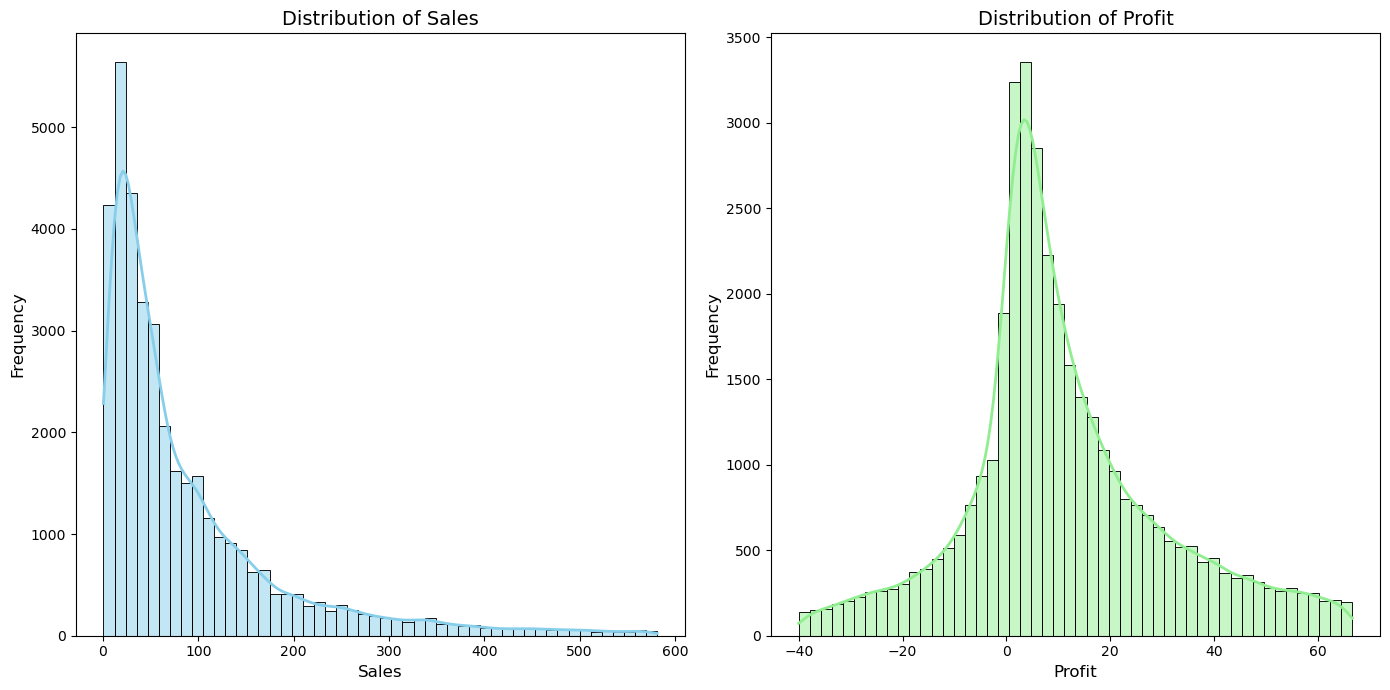

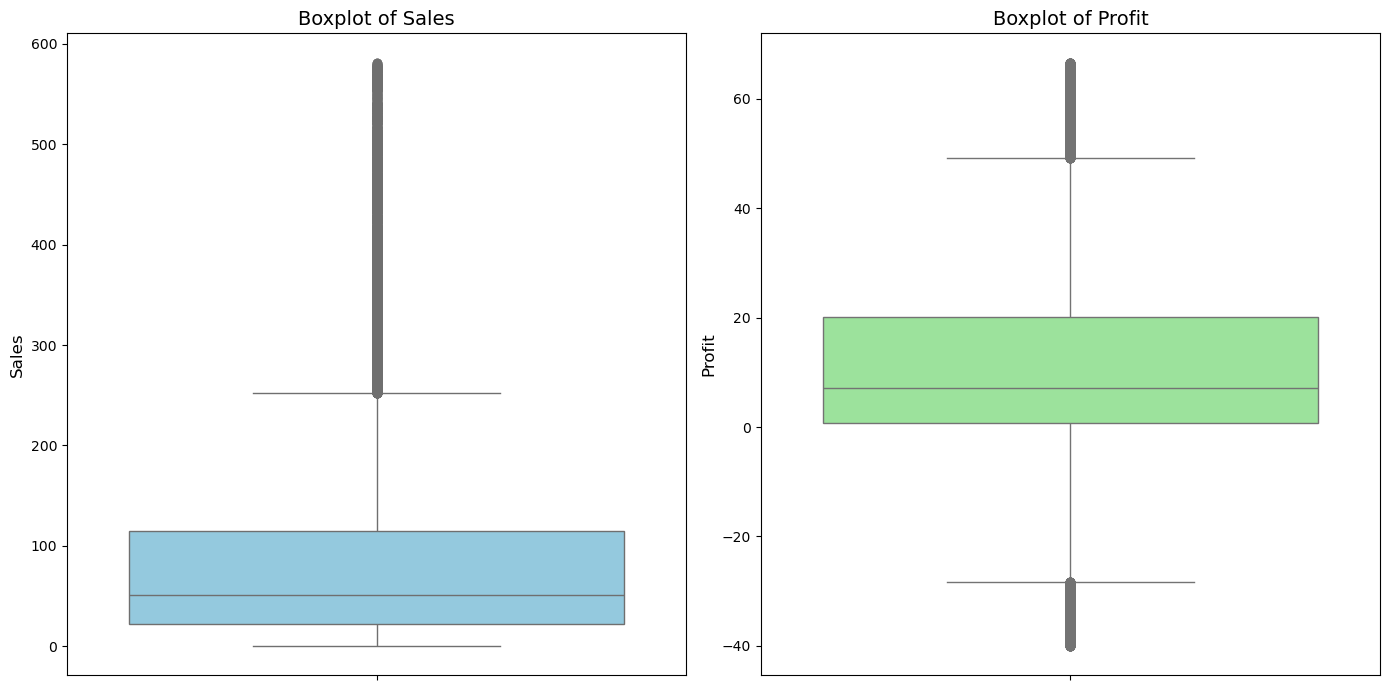

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Data Visualization

# Histogram for Sales and Profit
plt.figure(figsize=(14, 7))

# Sales Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=50, kde=True, color='skyblue', line_kws={'color': 'blue', 'lw': 2})
plt.title('Distribution of Sales', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Profit Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=50, kde=True, color='lightgreen', line_kws={'color': 'green', 'lw': 2})
plt.title('Distribution of Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Boxplot for Outliers in Sales and Profit
plt.figure(figsize=(14, 7))

# Sales Boxplot (with y-axis showing the values of the 'Sales')
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'], color='skyblue')
plt.title('Boxplot of Sales', fontsize=14)
plt.ylabel('Sales', fontsize=12)

# Profit Boxplot (with y-axis showing the values of the 'Profit')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Profit'], color='lightgreen')
plt.title('Boxplot of Profit', fontsize=14)
plt.ylabel('Profit', fontsize=12)

plt.tight_layout()
plt.show()



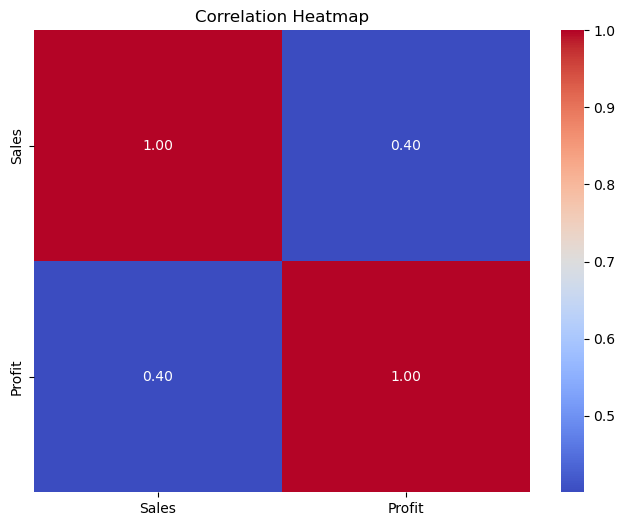

In [13]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


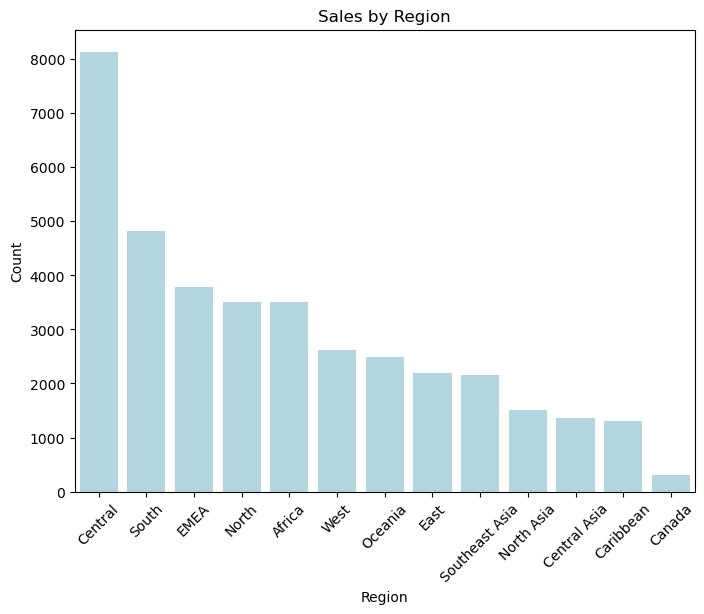

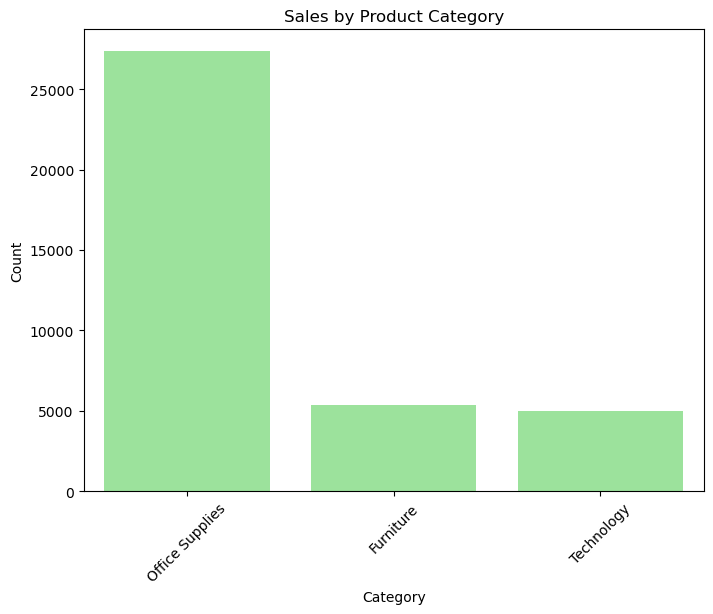

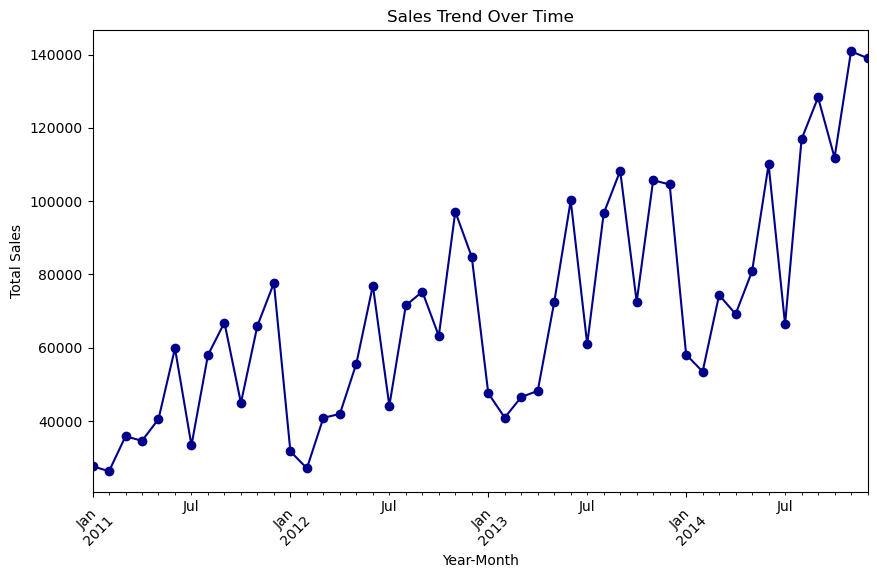

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 6: Additional Visualizations

# Sales by Region
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values, color='lightblue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sales by Product Category
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values, color='lightgreen')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sales Trend Over Time (Assuming there's a 'Date' column in the dataset)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')  # Ensure the 'Order Date' is in datetime format
df['YearMonth'] = df['Order Date'].dt.to_period('M')  # Create a 'YearMonth' column for time grouping

monthly_sales = df.groupby('YearMonth')['Sales'].sum()  # Group by 'YearMonth' and sum up the 'Sales'

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='darkblue', marker='o')  # Use basic dark blue color for the line plot
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 7: Save the Cleaned Dataset
df.to_csv('Cleaned_Global_Superstore.csv', index=False)
